In [1]:
# 사용할 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

In [2]:
# 아이리스 데이터셋 불러오기
iris = load_iris()

In [3]:
# 데이터셋 확인
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 판다스 데이터 프레임으로 변환
iris_pd = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# 이이리스 종류를 타겟으로 설정하고 데이터 프레임에 추가
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 데이터 프레임 정보 확인
iris_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 기본 통계 정보 확인
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# X, y 변수 설정
X = iris_pd[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_pd['species'].to_numpy()

In [9]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
# 데이터셋 모양 확인
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [11]:
# 데이터 전처리 : 스케일 변경
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
X_train_scaled

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [13]:
X_test_scaled

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

In [14]:
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.9666666666666667
1.0


In [15]:
print(lr.coef_, lr.intercept_)

[[-1.00316768  1.14456076 -1.81255767 -1.69176083]
 [ 0.52785456 -0.28289055 -0.34085076 -0.71984718]
 [ 0.47531311 -0.8616702   2.15340842  2.41160801]] [-0.13379691  1.98339163 -1.84959472]


In [16]:
# 결정트리 기반으로 학습 및 점수 확인
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

1.0
1.0


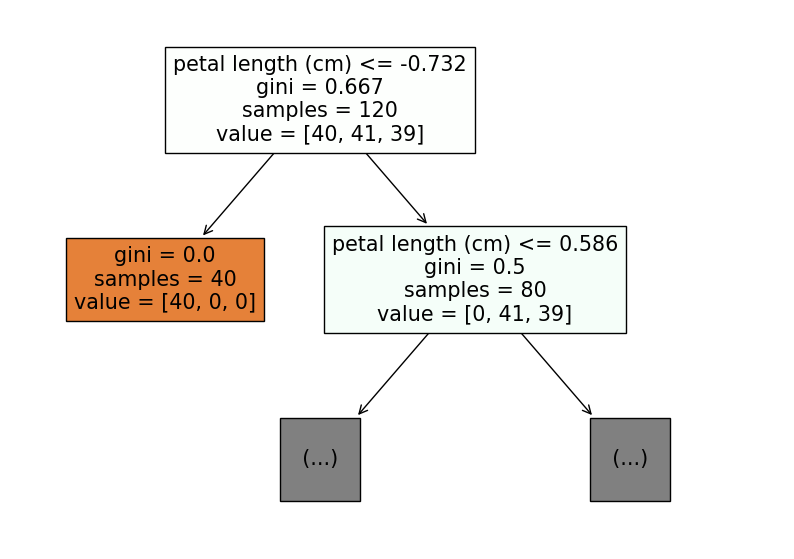

In [17]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [18]:
# max_depth 파라미터 적용
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.9583333333333334
1.0


In [19]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

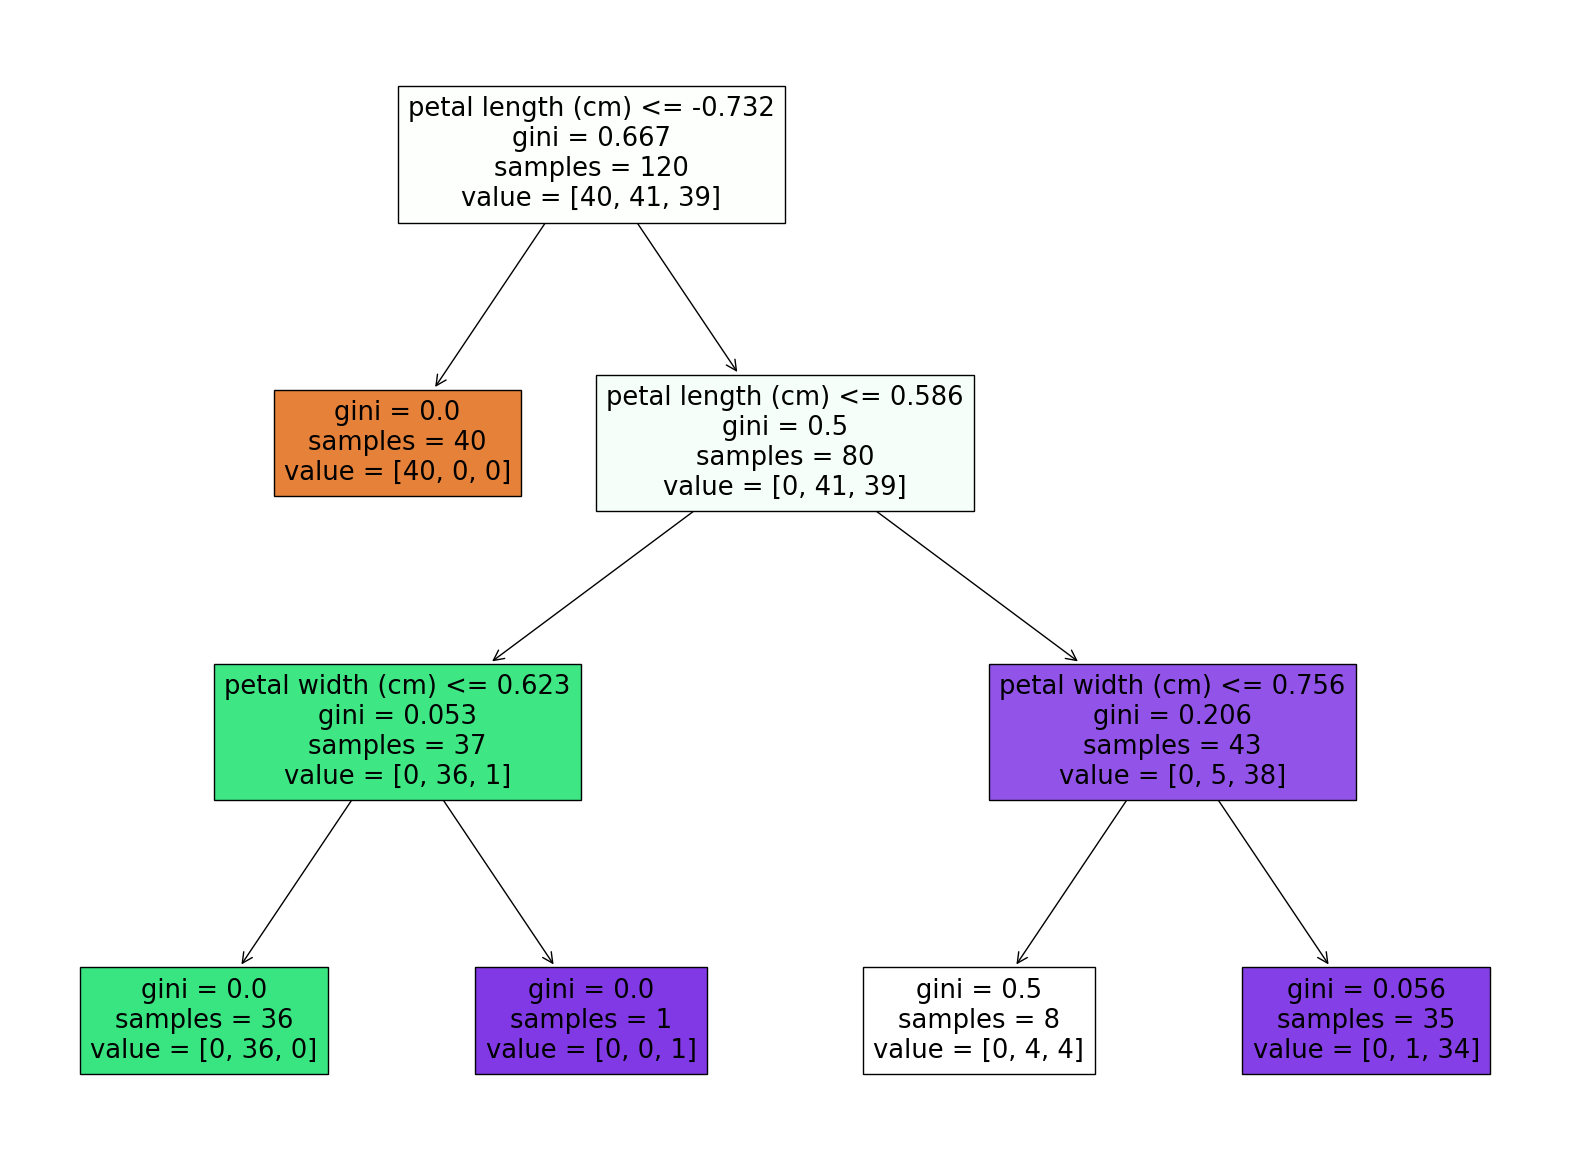

In [20]:
# 그래프로 확인
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [21]:
dt.feature_importances_

array([0.        , 0.        , 0.93462632, 0.06537368])

### 특성 중요도 확인 결과
- petal length > petal width 순으로 중요
- sepal 컬럼은 사용하지 않음.

0.9583333333333334
1.0
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[0.         0.         0.93462632 0.06537368]


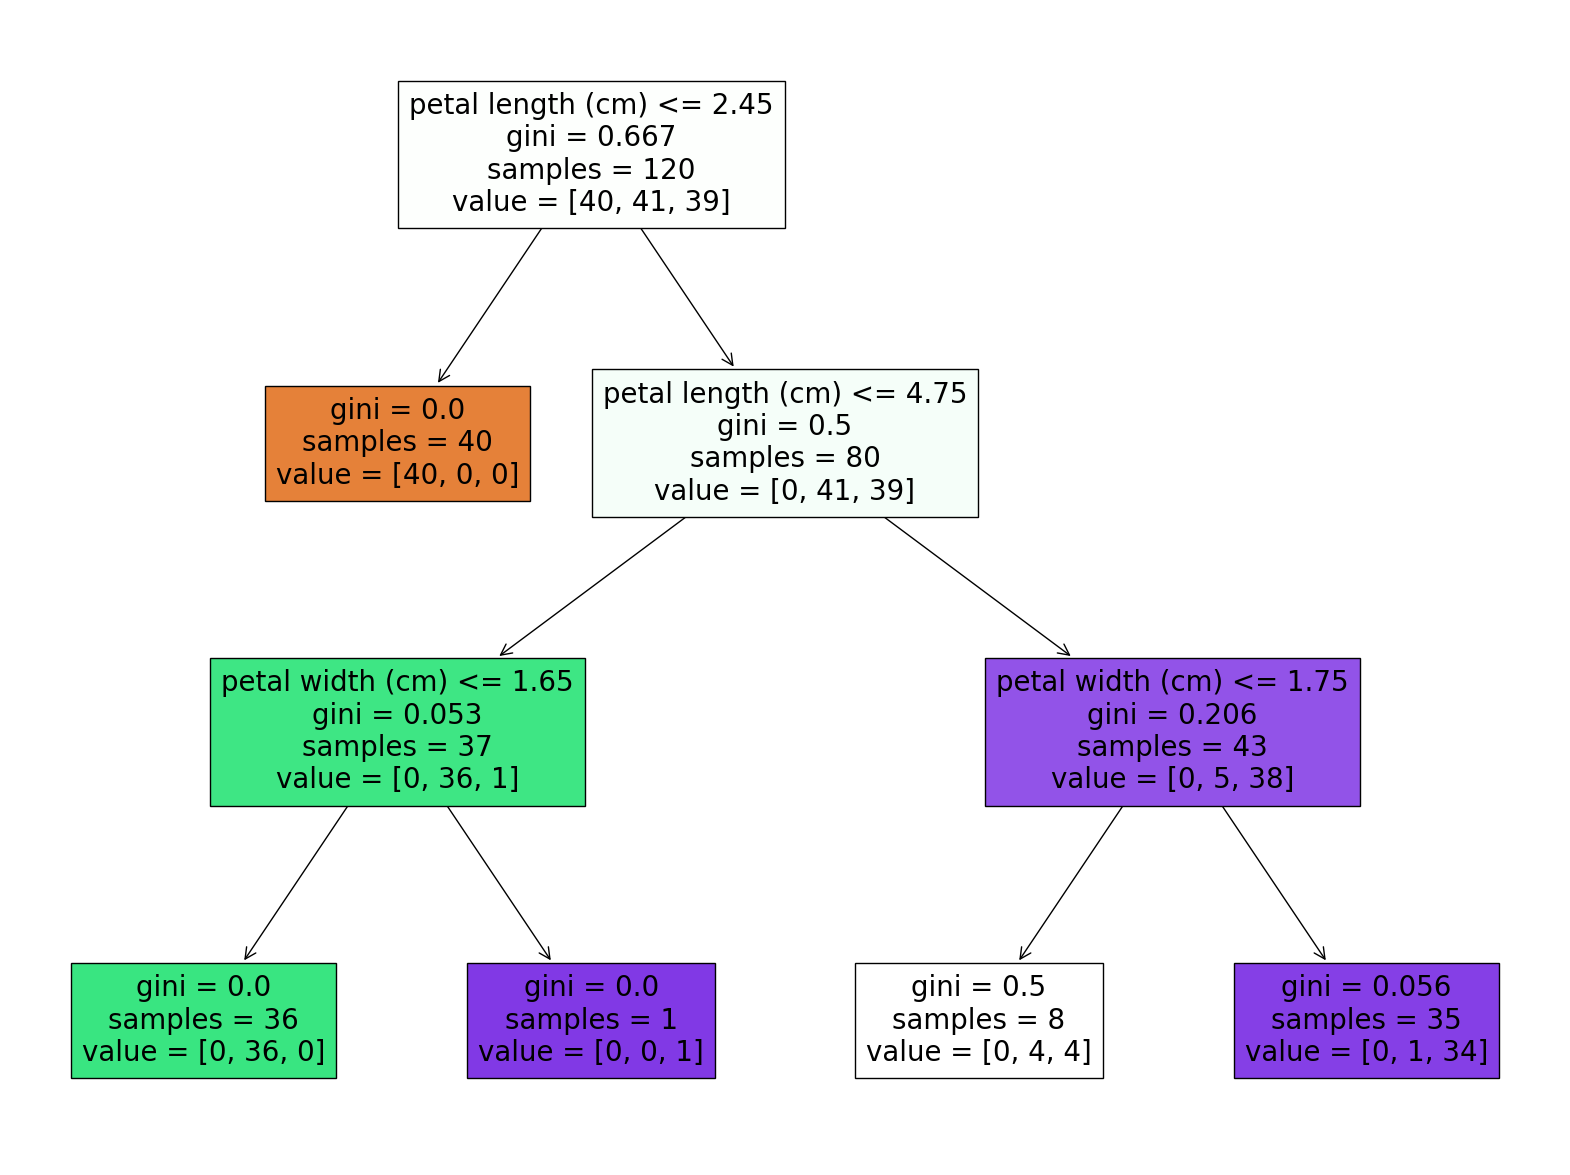

In [22]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print(dt.feature_names_in_)
print(dt.feature_importances_)

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [23]:
sum(dt.feature_importances_)

1.0

1.0
1.0


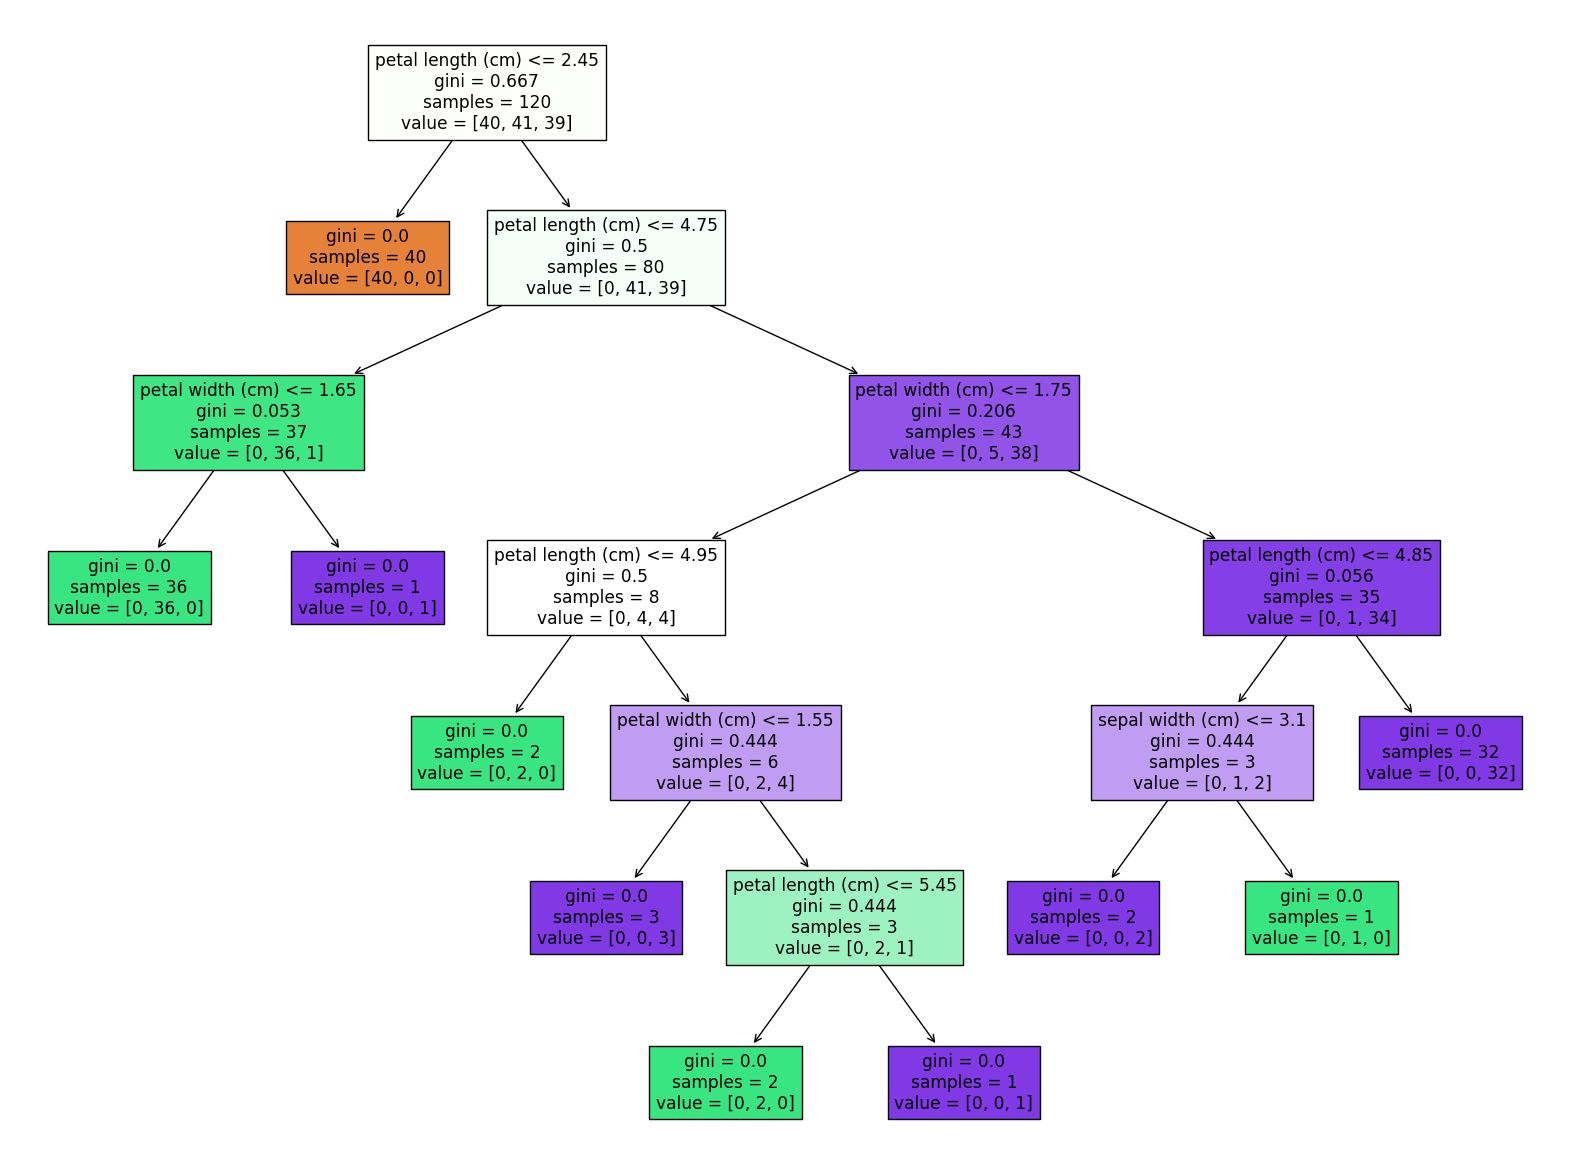

In [24]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

0.9916666666666667
1.0


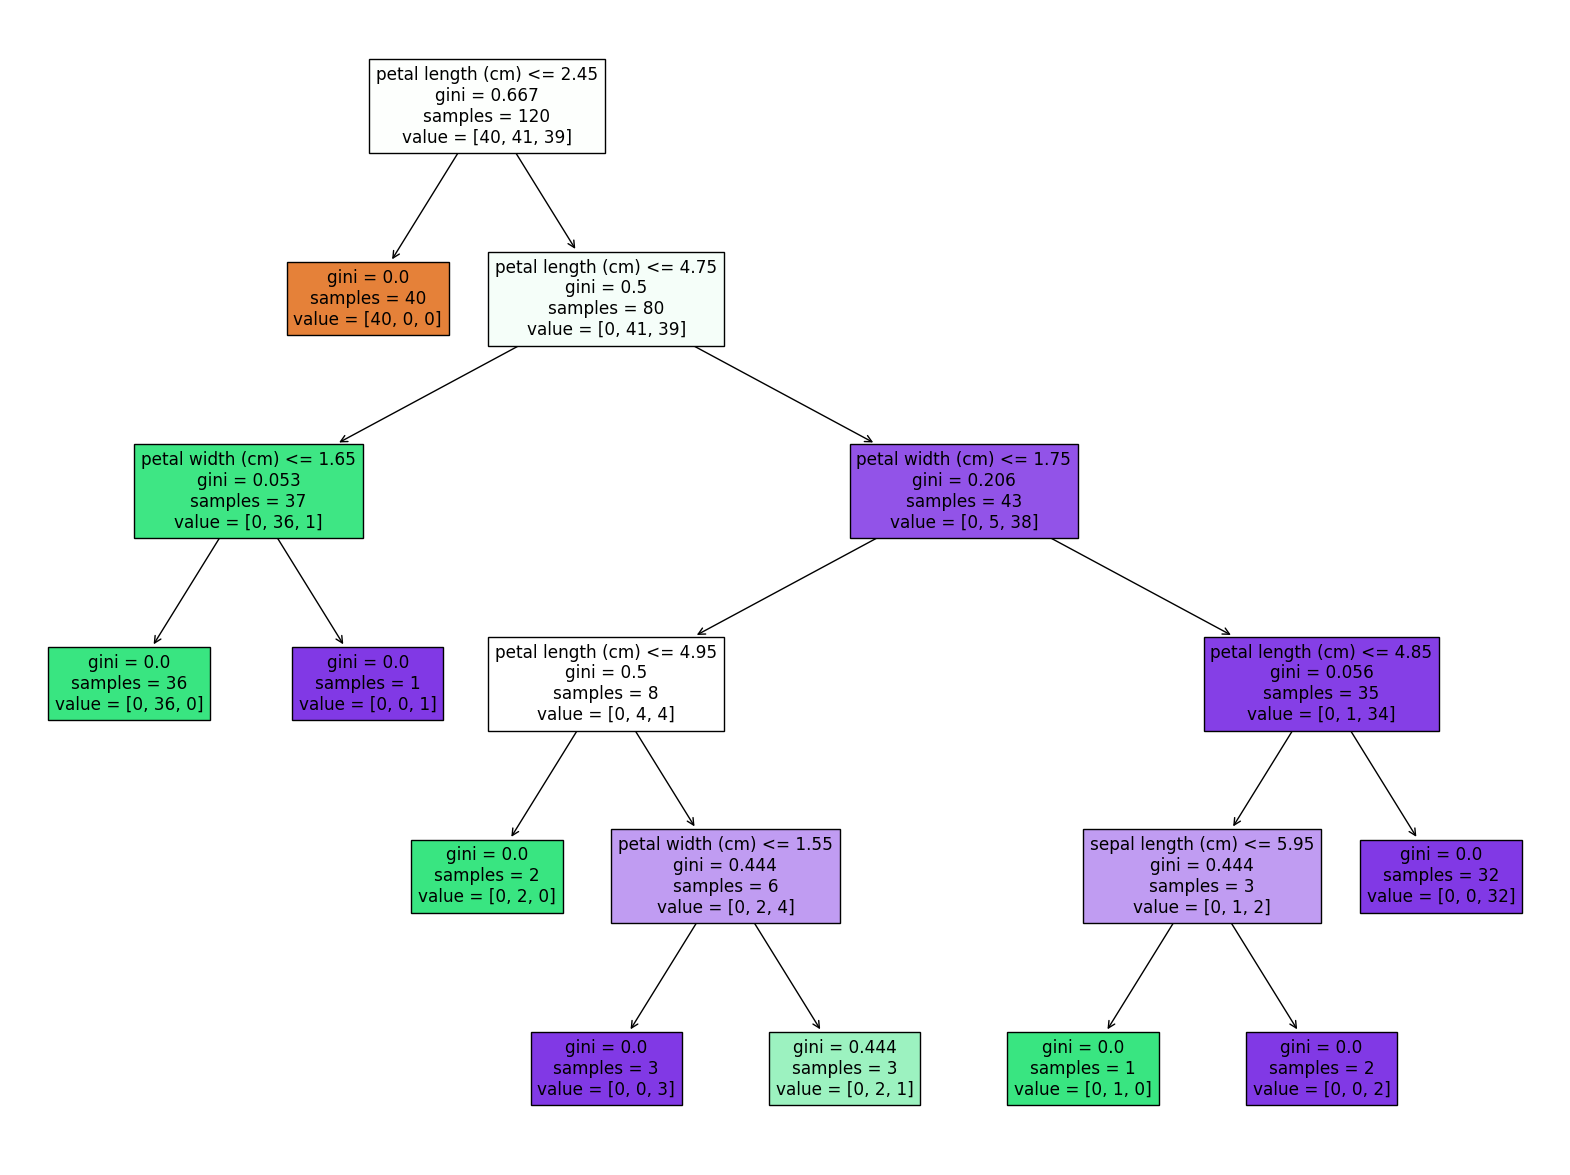

In [25]:
dt = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()